# Shards + gravitational focusing effect
Velocity distribution of the SHM+Shards halo with gravitational focusing effect (see below) on the speed distributions and annual modulation

![title](../plots/plots_png/Lee-GravFocusDiagram.png)

Taken from https://arxiv.org/abs/1308.1953

- Gravitational focusing adds a separate modulating component due to the overall enhancement in the dark matter density. This adds to the one present due to the relative motion of the halo and the Earth to give two separetly modulating effects

- The focusing is implemented in such a way to spoil the unitarity of $f(v)$, which is interpreted as an enhacement of the dark matter density relative to the value at $\infty$

- This section of the code is slow due to the fine resolution needed when computing the angular integrals

In [123]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta
sig_beta = HaloModel.SausageDispersionTensor
eta = 0.2

# Load shards
df = pandas.read_csv('../data/FitShards.csv')
names = df.group_id
nshards = size(names)
velocities = zeros(shape=(nshards,3))
dispersions = zeros(shape=(nshards,3))
velocities[0:(nshards),0] = df.vx # stream velocities
velocities[0:(nshards),1] = df.vy
velocities[0:(nshards),2] = df.vz
dispersions[0:(nshards),0] = df.sigx # dispersion tensors
dispersions[0:(nshards),1] = df.sigy
dispersions[0:(nshards),2] = df.sigz
pops = df.population
Psun = df.Psun
Psun[Psun==inf] = 0.0
weights = pops#*norm.pdf(Psun,loc=0.0,scale=1.0)/norm.pdf(0.0,loc=0.0,scale=1.0)
weights /= sum(weights)

# DM params
A = 23
m_chi = 10.0
sigma_p = 1.0e-45

# Energies
n = 5000
E_th = 2.0
E_max = 50.0
E = logspace(log(0.01),log10(E_max),n)
v_min = MinimumWIMPSpeed(E,A,m_chi)

# Times
ndays = 100
days = linspace(0,365,ndays)

    
# Calculate everything
dR0 = zeros(shape=(ndays,n))
dR = zeros(shape=(ndays,n))
R = zeros(shape=ndays)
R0 = zeros(shape=ndays)
dR0_gf = zeros(shape=(ndays,n))
dR_gf = zeros(shape=(ndays,n))
R_gf = zeros(shape=ndays)
R0_gf = zeros(shape=ndays)
for i in range(0,ndays):
    gmin0 = gvmin_Isotropic(v_min,days[i])
    gmin0_gf = gvmin_Isotropic(v_min,days[i],GravFocus=True)
    gmin_sub = zeros(shape=shape(gmin0))
    gmin_sub_gf = zeros(shape=shape(gmin0))
    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        gmin_sub += weights[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s)
        gmin_sub_gf += weights[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s,GravFocus=True)
    dR[i,:] = diffRecoilRate_SI(E,gmin_sub,A,sigma_p,m_chi,rho_0=0.55)
    dR_gf[i,:] = diffRecoilRate_SI(E,gmin_sub_gf,A,sigma_p,m_chi,rho_0=0.55)
    dR0[i,:] = diffRecoilRate_SI(E,gmin0,A,sigma_p,m_chi,rho_0=0.55)
    dR0_gf[i,:] = diffRecoilRate_SI(E,gmin0_gf,A,sigma_p,m_chi,rho_0=0.55)
    R[i] = trapz(dR[i,(E>E_th)],E[E>E_th])
    R_gf[i] = trapz(dR[i,(E>E_th)],E[E>E_th])

    R0[i] = trapz(dR0[i,(E>E_th)],E[E>E_th])
    R0_gf[i] = trapz(dR0_gf[i,(E>E_th)],E[E>E_th])
    print 'day = ',i,'of',ndays

/Users/ciaranohare/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


day =  0 of 100
day =  1 of 100
day =  2 of 100
day =  3 of 100
day =  4 of 100
day =  5 of 100
day =  6 of 100
day =  7 of 100
day =  8 of 100
day =  9 of 100
day =  10 of 100
day =  11 of 100
day =  12 of 100
day =  13 of 100
day =  14 of 100
day =  15 of 100
day =  16 of 100
day =  17 of 100
day =  18 of 100
day =  19 of 100
day =  20 of 100
day =  21 of 100
day =  22 of 100
day =  23 of 100
day =  24 of 100
day =  25 of 100
day =  26 of 100
day =  27 of 100
day =  28 of 100
day =  29 of 100
day =  30 of 100
day =  31 of 100
day =  32 of 100
day =  33 of 100
day =  34 of 100
day =  35 of 100
day =  36 of 100
day =  37 of 100
day =  38 of 100
day =  39 of 100
day =  40 of 100
day =  41 of 100
day =  42 of 100
day =  43 of 100
day =  44 of 100
day =  45 of 100
day =  46 of 100
day =  47 of 100
day =  48 of 100
day =  49 of 100
day =  50 of 100
day =  51 of 100
day =  52 of 100
day =  53 of 100
day =  54 of 100
day =  55 of 100
day =  56 of 100
day =  57 of 100
day =  58 of 100
day =  

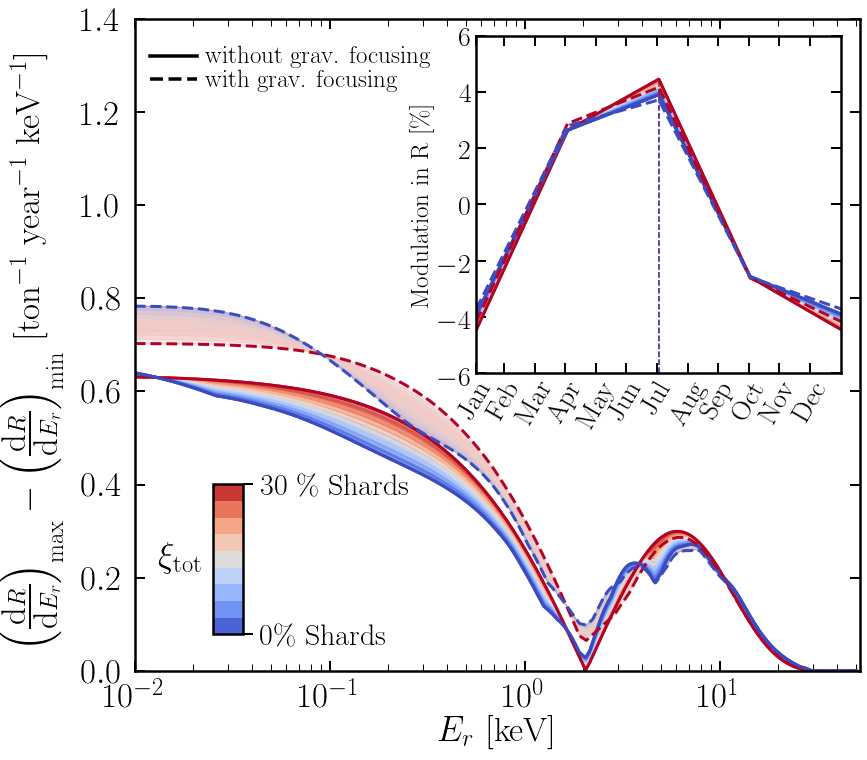

In [32]:
import matplotlib.gridspec as gridspec

Rdiff = zeros(shape=n)
Rdiff0 = zeros(shape=n)
Rdiff_gf = zeros(shape=n)
Rdiff0_gf = zeros(shape=n)
for i in range(0,n):
    Rdiff[i] = max(dR[:,i])-min(dR[:,i])
    Rdiff0[i] = max(dR0[:,i])-min(dR0[:,i])
    Rdiff_gf[i] = max(dR_gf[:,i])-min(dR_gf[:,i])
    Rdiff0_gf[i] = max(dR0_gf[:,i])-min(dR0_gf[:,i])

# Figure
pltname = 'Shards_annualmod_gravfocus'
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
left, bottom, width, height = [0.49, 0.47, 0.39, 0.39]
ax2 = fig.add_axes([left, bottom, width, height])


n_xi = 10
xi_vals = linspace(0,0.35,n_xi)
col = flipud(cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm

# Main plot
plt.sca(ax1)
y2 = xi_vals[-1]*Rdiff+(1-xi_vals[-1])*Rdiff0
y2_gf = xi_vals[-1]*Rdiff_gf+(1-xi_vals[-1])*Rdiff0_gf
for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,'-',color=col[i,:],linewidth=3)
    
plt.plot(E,Rdiff0,linewidth=3,color=col[0,:])
plt.plot(E,y2,linewidth=3,color=col[-1,:])


for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff_gf+(1-xi_vals[i])*Rdiff0_gf,y2=y2_gf,color=col[i,:],alpha=0.1)
plt.plot(E,Rdiff0_gf,'--',linewidth=3,color=col[0,:])
plt.plot(E,y2_gf,'--',linewidth=3,color=col[-1,:])

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel(r"$E_r$ [keV]",fontsize=40);
plt.ylabel(r"$\left(\frac{\textrm{d}R}{\textrm{d}E_r}\right)_{\rm max} - \left(\frac{\textrm{d}R}{\textrm{d}E_r}\right)_{\rm min}$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]" ,fontsize=35,labelpad=10);
ax1.set_xlim(left=0.01)
ax1.set_ylim(bottom=0.0,top=1.4)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=12)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax1.set_xscale('log')

# second "legend"
ax1.plot([0.012,0.021],[1.32,1.32], 'k-',linewidth=3.5)
ax1.plot([0.012,0.021],[1.27,1.27], 'k--',linewidth=3.5)
ax1.text(0.023,1.35-0.045,'without grav. focusing',fontsize=25)
ax1.text(0.023,1.3-0.045,'with grav. focusing',fontsize=25)





# Inset plot
plt.sca(ax2)
ymax = 6

R0mid = (max(R0)+min(R0))/2.0
Rmid = (max(R)+min(R))/2.0
R0mid_gf = (max(R0_gf)+min(R0_gf))/2.0
Rmid_gf = (max(R_gf)+min(R_gf))/2.0
y2 = 100*xi_vals[-1]*(R-Rmid)/Rmid+100*(1.0-xi_vals[-1])*(R0-R0mid)/R0mid
y2_gf = 100*xi_vals[-1]*(R_gf-Rmid_gf)/Rmid_gf+100*(1.0-xi_vals[-1])*(R0_gf-R0mid_gf)/R0mid_gf

for i in range(0,n_xi):
    Rt = 100*xi_vals[i]*(R-Rmid)/Rmid+100*(1.0-xi_vals[i])*(R0-R0mid)/R0mid
    plt.fill_between(days,Rt,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(days,Rt,'-',color=col[i,:],linewidth=3)
plt.plot(days,100*(R0-R0mid)/R0mid,linewidth=3,color=col[0,:])
plt.plot(days,y2,linewidth=3,color=col[-1,:])
plt.plot(days,100*(R0_gf-R0mid_gf)/R0mid_gf,'--',linewidth=3,color=col[0,:])
plt.plot(days,y2_gf,'--',linewidth=3,color=col[-1,:])
diffR = 100*(R0-R0mid)/R0mid
plt.plot([days[argmax(diffR)],days[argmax(diffR)]],[-ymax,amax(diffR)],'--',color=col[0,:])
plt.plot([days[argmax(y2)],days[argmax(y2)]],[-ymax,amax(y2)],'--',color=col[-1,:])

#diffR_gf = 100*(R0_gf-R0mid_gf)/R0mid_gf
#plt.plot([days[argmax(diffR_gf)],days[argmax(diffR_gf)]],[-ymax,amax(diffR_gf)],'--',color=col[0,:])
#plt.plot([days[argmax(y2_gf)],days[argmax(y2_gf)]],[-ymax,amax(y2_gf)],'--',color=col[-1,:])


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax2.set_xlim(left=0.0,right=365)
ax2.set_ylim(bottom=-ymax,top=ymax)
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=60)
plt.ylabel(r"Modulation in R [\%]" ,fontsize=25);
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=4,labelsize=28)

# Custom colorbar
cbar_max = r'30 \% Shards'
cbar_min = r'0\% Shards'
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax2, width="15%", height="30%", bbox_to_anchor=[30, -200, 200, 500]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.15,0.24,r'$\xi_{\rm tot}$',fontsize=35,color='k')


plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

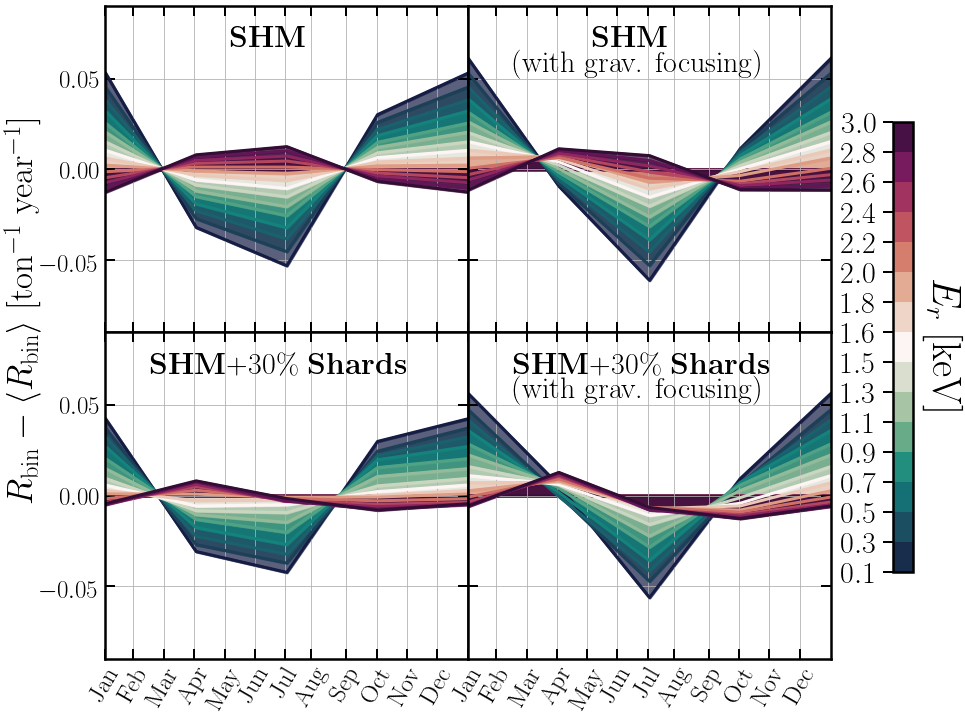

In [122]:
import matplotlib.gridspec as gridspec
pltname = 'Shards_annualmod_gravfocus_Energies'


nbins = 15
bin_edges = linspace(0.1,3.0,nbins+1)

def bin_dR(fdR):
    Rbin = zeros(shape=(ndays,nbins))
    for i in range(0,ndays):
        for j in range(0,nbins):
            E1 = bin_edges[j]
            E2 = bin_edges[j+1]
            Ec = E[(E>E1)&(E<E2)]
            dRc = fdR[i,(E>E1)&(E<E2)]
            Rbin[i,j] = trapz(dRc,Ec)
    return Rbin

Rbin0 = bin_dR(dR0)
Rbin0_gf = bin_dR(dR0_gf)
Rbin = bin_dR((1-0.3)*dR0+0.3*dR)
Rbin_gf = bin_dR((1-0.3)*dR0_gf+0.3*dR_gf)

# Set up subplots
fig, axarr = plt.subplots(2, 2,figsize=(13,12))
gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.0,wspace=0.0)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

ymax = 0.09
labelx = 125
labely = 0.75*ymax
ticklocs = cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31
ticklocs[7] -= 5
ticklabs = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.sca(ax1)
import cmocean
colbins = (cmocean.cm.curl(linspace(0,1,nbins)))
cmap = cmocean.cm.curl
for i in range(0,nbins):
    yc = Rbin0[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
plt.xticks(ticklocs)
plt.text(labelx,labely,r'{\bf SHM}',fontsize=30)
        
plt.sca(ax2)
for i in range(0,nbins):
    yc = Rbin0_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
plt.xticks(ticklocs)
plt.text(labelx,labely,r'{\bf SHM}',fontsize=30)
plt.text(labelx-80,labely-0.013,r'(with grav. focusing)',fontsize=30)

plt.sca(ax3)
for i in range(0,nbins):
    yc = Rbin[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
plt.xticks(ticklocs,ticklabs,rotation=60)
plt.text(labelx-80,labely,r'{\bf SHM}+30\% {\bf Shards}',fontsize=30)

plt.sca(ax4)
for i in range(0,nbins):
    yc = Rbin_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])   
plt.xticks(ticklocs,ticklabs,rotation=60)
plt.text(labelx-80,labely,r'{\bf SHM}+30\% {\bf Shards}',fontsize=30)
plt.text(labelx-80,labely-0.013,r'(with grav. focusing)',fontsize=30)

    
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax1.set_xlim([0,days[-1]])
ax2.set_xlim([0,days[-1]])
ax3.set_xlim([0,days[-1]])
ax4.set_xlim([0,days[-1]])
ax1.set_ylim([-ymax,ymax])
ax2.set_ylim([-ymax,ymax])
ax3.set_ylim([-ymax,ymax])
ax4.set_ylim([-ymax,ymax])

# Custom colorbar
cbaxes = inset_axes(ax2, width="10%", height="90%", bbox_to_anchor=[730, 150, 200, 500]) 
norm = mpl.colors.Normalize(vmin=bin_edges[0],vmax=bin_edges[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=around(bin_edges,1),boundaries=around(bin_edges,1),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[5]
cbar.tick_params(labelsize=20) 
cbar.tick_params(which='major',direction='out',width=2,length=10,left=True,right=False,pad=7,labelsize=30)
cbar.tick_params(which='minor',direction='out',width=2,length=7,left=True,right=False)
cbar.yaxis.set_ticks_position('left')
cbar.set_ylabel(r'$E_r$ [keV]',rotation=-90,labelpad=45)
cbar.yaxis.label.set_size(40)
#cbar.yaxis.set_label_position("right")
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax2.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax3.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax4.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax4.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

#ax1.set_ylabel(r'\quad\quad\quad$R_{\rm bin}-\langle R_{\rm bin}\rangle$ [ton$^{-1}$ year$^{-1}$]',fontsize=30)
#ax3.set_ylabel(r'\quad\quad\quad$R_{\rm bin}-\langle R_{\rm bin}\rangle$ [ton$^{-1}$ year$^{-1}$]',fontsize=30)
plt.gcf().text(0.02,0.72,r'\quad\quad\quad$R_{\rm bin}-\langle R_{\rm bin}\rangle$ [ton$^{-1}$ year$^{-1}$]',rotation=90,fontsize=35)

plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [50]:
around(bin_edges,2)

array([ 0.1 ,  0.29,  0.49,  0.68,  0.87,  1.07,  1.26,  1.45,  1.65,
        1.84,  2.03,  2.23,  2.42,  2.61,  2.81,  3.  ])

In [ ]:
# Overall Normalisation

# Pre-allocate
fv0 = zeros(shape=(ndays,n))
fv0_gf = zeros(shape=(ndays,n))
fv = zeros(shape=(ndays,n))
fv_gf = zeros(shape=(ndays,n))

# Loop over days to get all speed distributions for the year
for i in range(0,ndays):
    day = days[i]
    fv0[i,:] = (1-eta)*SpeedDist_Triaxial(v,day,array([1.0,1.0,1.0])*233.0/sqrt(2.0),v_esc=1000.0)\
            +eta*SpeedDist_Triaxial(v,day,sig_beta,v_esc=1000.0) # Unfocused SHM++
    fv0_gf[i,:] = (1-eta)*SpeedDist_Triaxial(v,day,array([1.0,1.0,1.0])*233.0/sqrt(2.0),v_esc=1000.0,GravFocus=True)\
                +eta*SpeedDist_Triaxial(v,day,sig_beta,v_esc=1000.0,GravFocus=True) # Focused SHM++
        
    # Loop over each shard
    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        fv[i,:] += pops[isub]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,v_esc=1000.0) # Unfocused shards
        fv_gf[i,:] += pops[isub]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,v_esc=1000.0,GravFocus=True) # Focused shards
    print 'day = ',i # print progress

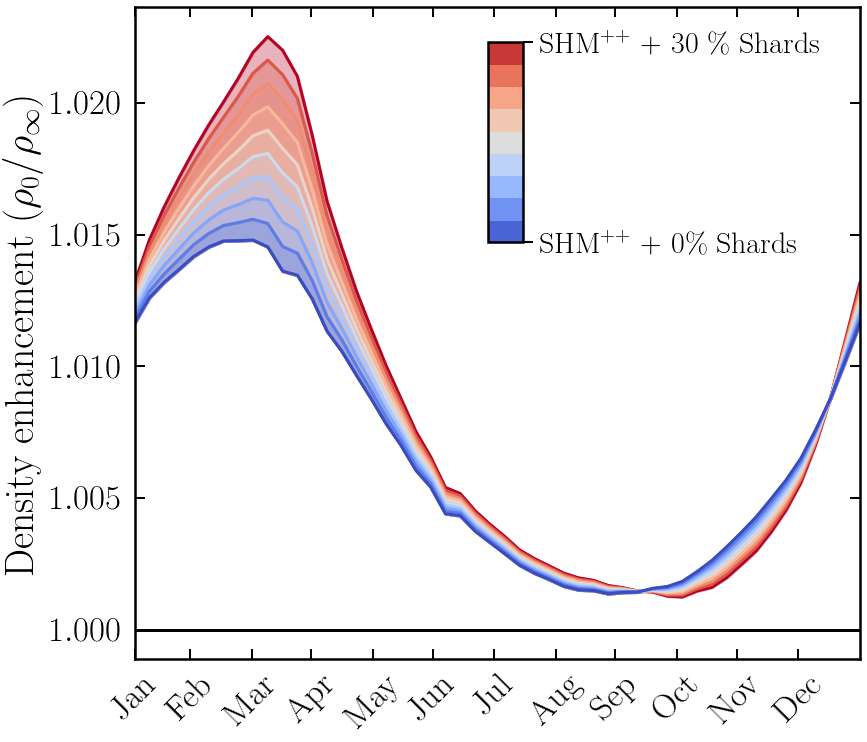

In [33]:
# Set up plot
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
pltname = 'Shards_GravFocusedDensity'

# Preallocate densities
rho0 = zeros(shape=ndays)
rho0_gf = zeros(shape=ndays)
rho = zeros(shape=ndays)
rho_gf = zeros(shape=ndays)
   
# Calculate density enhancement by integrating over f(v)
for i in range(0,ndays):
    rho0[i] = trapz(fv0[i,:],v)
    rho0_gf[i] = trapz(fv0_gf[i,:],v)

# Plot for each value of xi (shard fraction)
col = (cm.coolwarm(linspace(0,1,n_xi)))
for j in range(0,n_xi):
    ix = n_xi-1-j
    xi = xi_vals[ix]
    for i in range(0,ndays):
        rho[i] = trapz((1-xi)*fv0[i,:]+xi*fv[i,:],v)
        rho_gf[i] = trapz((1-xi)*fv0_gf[i,:]+xi*fv_gf[i,:],v)
    plt.fill_between(days,rho_gf,y2=rho0_gf,linewidth=3,color=col[ix,:],alpha=0.3)
    plt.plot(days,rho_gf,linewidth=3,color=col[ix,:])

# Plot 0-points (should be = 1)
for i in range(0,ndays):
    rho[i] = trapz(fv[i,:],v)
plt.plot(days,rho0,'--',color=col[0,:])
plt.plot(days,rho,'--',color=col[-1,:])

# rho = rho_0 line
plt.plot([0,365],[1,1],'k-',linewidth=3)

# Plot fiddling
plt.ylabel(r'Density enhancement ($\rho_0/\rho_\infty$)',fontsize=40)
plt.xlim([0,365])
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=35)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Show and save
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')